# Описание проекта

In [ ]:
#!pip install pingouin
import pandas as pd
import statistics
import numpy as np
import scipy.stats
#import pingouin as pg


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import plotly.express as px
plt.style.use('dark_background')

sns.set(rc={'figure.figsize':(16,6)}, style='darkgrid')
pd.options.mode.chained_assignment = None

Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.

Файлы:

## Customers (olist_customers)

In [ ]:
! gdown --id 1e7UFs0aDVxiCoKaaGw5QNm477cZKLRJd

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1e7UFs0aDVxiCoKaaGw5QNm477cZKLRJd
To: /content/olist_customers_dataset.csv
100% 9.03M/9.03M [00:00<00:00, 46.7MB/s]




 olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей https://drive.google.com/file/d/1e7UFs0aDVxiCoKaaGw5QNm477cZKLRJd/view?usp=sharing

- customer_id — позаказный идентификатор пользователя

- customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

- customer_zip_code_prefix —  почтовый индекс пользователя

- customer_city —  город доставки пользователя

- customer_state —  штат доставки пользователя

In [ ]:
customers = pd.read_csv('/content/olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Orders (olist_orders)

In [ ]:
! gdown --id 1SCMMwxJRgEXC5lVjo1cg-NU5av-s1z6H

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SCMMwxJRgEXC5lVjo1cg-NU5av-s1z6H
To: /content/olist_orders_dataset.csv
100% 17.7M/17.7M [00:00<00:00, 41.9MB/s]


olist_orders_dataset.csv —  таблица заказов

https://drive.google.com/file/d/1SCMMwxJRgEXC5lVjo1cg-NU5av-s1z6H/view?usp=sharing

- order_id —  уникальный идентификатор заказа (номер чека)

- customer_id —  позаказный идентификатор пользователя

- order_status —  статус заказа

- order_purchase_timestamp —  время создания заказа

- order_approved_at —  время подтверждения оплаты заказа

- order_delivered_carrier_date —  время передачи заказа в логистическую службу

- order_delivered_customer_date —  время доставки заказа

- order_estimated_delivery_date —  обещанная дата доставки

Уникальные статусы заказов в таблице olist_orders_dataset:

- created —  создан
- approved —  подтверждён
- invoiced —  выставлен счёт
- processing —  в процессе сборки заказа
- shipped —  отгружен со склада
- delivered —  доставлен пользователю
- unavailable —  недоступен
- canceled —  отменён

In [ ]:
orders = pd.read_csv('/content/olist_orders_dataset.csv')
orders.shape

(99441, 8)

In [ ]:
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])

## Items (olist_order_items)

In [ ]:
!gdown --id 1PQWLSgik_ma43i42rRICKI2GxbHr0CI8

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PQWLSgik_ma43i42rRICKI2GxbHr0CI8
To: /content/olist_order_items_dataset.csv
100% 15.4M/15.4M [00:00<00:00, 38.1MB/s]


olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
https://drive.google.com/file/d/1PQWLSgik_ma43i42rRICKI2GxbHr0CI8/view?usp=sharing

- order_id —  уникальный идентификатор заказа (номер чека)

- order_item_id —  идентификатор товара внутри одного заказа

- product_id —  ид товара (аналог штрихкода)

- seller_id — ид производителя товара

- shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

- price —  цена за единицу товара

- freight_value —  вес товар-а

- — Пример структуры данных можно визуализировать по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5

In [ ]:
items =pd.read_csv('/content/olist_order_items_dataset.csv')
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## 1- Cколько пользователей совершили покупку 1 раз (90536)


Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)

- Т.к. нет одельного статуса на совершение покупки, будем считать, что статус Заказа - delivered — доставлен пользователю и бы оплачен, равнозначен совершением покупки пользователе.

- Посчитаем количество соверешенных заказов (количество customer_id  у каждого customer_unique_id )

In [ ]:
#customers['customer_unique_id'].value_counts()
# покупателей сделавших заказы - 96 096

In [ ]:
#customers['customer_id'].value_counts()
# всего сделано заказов - 99 441

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
df_delivd = orders[orders['order_status'] =="delivered"]
# отбираем заказы исполненные = совершению покупки = 96 478
df_delivd.shape

(96478, 8)

In [ ]:
# объединяем таблицы  с покупателями и с заказами со статусом delivered
custom_delivd = df_delivd.merge(customers,how='left',on='customer_id')
custom_delivd.shape

(96478, 12)

In [ ]:
#custom_delivd.head(3)

In [ ]:
#custom_delivd_del = custom_delivd.dropna()
#удаляем пропуски
#custom_delivd_del.shape

In [ ]:
custom_delivd.groupby('customer_unique_id').agg({'customer_id' :'count'}).value_counts()

customer_id
1              90557
2               2573
3                181
4                 28
5                  9
6                  5
7                  3
9                  1
15                 1
dtype: int64

## 2- Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

In [ ]:
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)
orders['order_estimated_delivery_mance'] = orders.order_estimated_delivery_date.dt.strftime('%Y.%m')

In [ ]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,order_purchase_mance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017.10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018.07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018.08


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   order_purchase_date            99441 non-null  datetime64[ns]
 9   order_purchase_mance           99441 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 7.6+ MB


In [ ]:
orders.query('order_id == "00143d0f86d6fbd9f9b38ab440ac16f5"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,order_purchase_mance
36265,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06 00:00:00,2017-10-16 15:29:43,2017.10


* Поскольку в запросе нет четких временных границ и указание какой именно временной промежуток следует изучить, предположим, что есть необходимость посмотреть вообщем сколько было в среднем недоставленных заказам в обещанные сроки за весь имеющийся период.

* Также исходя из стуктуры данных можно предположить, что при изменении статуса заказа в базе данных меняется именно статус "order_status" с указанием даты изменения, а не путем добавления новой строки с "order_id"



In [ ]:
no_deliv = orders.query('order_status != "delivered"')\
.groupby(['order_status','order_estimated_delivery_mance'], as_index = False).agg({'order_id':'count'})\
.rename(columns={'order_id':'mean_no_deliv'})\
.groupby('order_status', as_index = False).agg({'mean_no_deliv':'mean'})

no_deliv

,order_status,mean_no_deliv
0,approved,1.000000
1,canceled,24.038462
2,created,1.666667
3,invoiced,14.952381
4,processing,15.842105
5,shipped,48.130435
6,unavailable,29.000000


In [ ]:
#второй способ подсчета
cancel_orders = orders.query('order_status != "delivered"')\
    .groupby([pd.Grouper(freq='M', key='order_estimated_delivery_date'),'order_status'],as_index=False)\
    .agg({'order_id':'count'})\
    .groupby('order_status',as_index=False)\
    .agg({'order_id':'mean'})\
    .rename(columns={'order_id':'mean_no_delivered'})

cancel_orders['perc'] = (cancel_orders['mean_no_delivered']/cancel_orders['mean_no_delivered'].sum())*100
cancel_orders.round(2)

,order_status,mean_no_delivered,perc
0,approved,1.00,0.74
1,canceled,24.04,17.86
2,created,1.67,1.24
3,invoiced,14.95,11.11
4,processing,15.84,11.77
5,shipped,48.13,35.75
6,unavailable,29.00,21.54


<Axes: xlabel='order_status', ylabel='mean_no_delivered'>

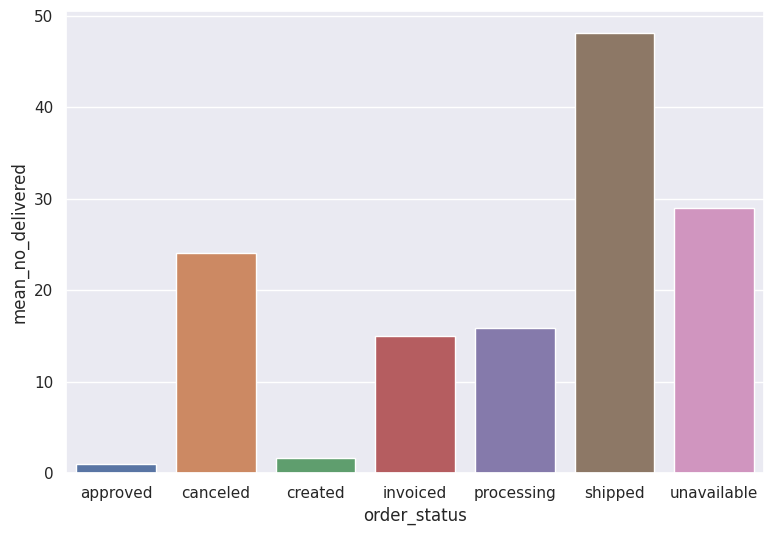

In [ ]:
fig, scatter = plt.subplots(figsize = (9,6))

sns.barplot(x='order_status',y='mean_no_delivered', data=cancel_orders)

Уникальные статусы заказов в таблице olist_orders_dataset:

- created — создан
- approved — подтверждён
- invoiced — выставлен счёт
- processing — в процессе сборки заказа
- shipped — отгружен со склада
- delivered — доставлен пользователю
- unavailable — недоступен
- canceled — отменён

Посмотрим какое количество недоставленных товаров в назначенную дату "estimated_delivery_date" моесяцам за каждый год в имеющихся данных


In [ ]:
no_deliv_m = orders.query('order_status != "delivered"')\
.groupby('order_estimated_delivery_mance', as_index = False).agg({'order_id':'count'})\
.sort_values(['order_id'], ascending = False)

no_deliv_m['mean'] = no_deliv_m['order_id']/no_deliv_m['order_id'].sum()
no_deliv_m

,order_estimated_delivery_mance,order_id,mean
14,2017.12,239,0.080661
17,2018.03,223,0.075262
22,2018.08,219,0.073912
5,2017.03,193,0.065137
18,2018.04,188,0.063449
16,2018.02,175,0.059062
13,2017.11,174,0.058724
19,2018.05,168,0.056699
11,2017.09,148,0.049949
10,2017.08,144,0.048599


самое большее количество недоставленных товаров в срок было в декабре 2017.
Посмотрим по каким основным причинам были причинам были не исполнены сроки

In [ ]:
no_deliv_ms = orders.loc[((orders['order_status'] != 'delivered') &(orders['order_estimated_delivery_mance'] == '2017.12'))]\
.groupby(['order_estimated_delivery_mance', 'order_status'], as_index = False).agg({'order_id':'count'})\
.sort_values(['order_id'], ascending = False)
no_deliv_ms

,order_estimated_delivery_mance,order_status,order_id
4,2017.12,shipped,75
5,2017.12,unavailable,69
2,2017.12,invoiced,38
3,2017.12,processing,28
0,2017.12,canceled,27
1,2017.12,created,2


## 3- По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

In [ ]:
items.shape

(112650, 7)

In [ ]:
orders.shape

(99441, 8)

In [ ]:
# объединяем таблицы  с заказами  и товарами
items_orders = items.merge(orders,how='left',on='order_id')
items_orders.shape

(112650, 14)

In [ ]:
items_orders.isna().mean().sort_values(ascending=False)

order_delivered_customer_date    0.021784
order_delivered_carrier_date     0.010599
order_approved_at                0.000133
order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
dtype: float64

In [ ]:
items_orders.fillna(0)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [ ]:
items_orders['purchase_day'] = pd.to_datetime(items_orders.order_purchase_timestamp)
items_orders['purchase_day'] = items_orders.purchase_day.dt.strftime('%A')
df=items_orders[['product_id', 'purchase_day','order_id']]
df=df.groupby(['product_id','purchase_day'], dropna=False, as_index=False)['order_id'].agg(['count']).sort_values('count')
df


count
product_id                       purchase_day       
00066f42aeeb9f3007548bb9d3f33c38 Sunday            1
9c7bdf67b06b419aefb93cfdfc96c55d Friday            1
                                 Saturday          1
                                 Sunday            1
                                 Wednesday         1
...                                              ...
aca2eb7d00ea1a7b8ebd4e68314663af Tuesday          85
                                 Friday           87
                                 Thursday         89
99a4788cb24856965c36a24e339b6058 Monday           92
422879e10f46682990de24d770e7f83d Wednesday        93

[61230 rows x 1 columns]

In [ ]:
df.query('product_id == "aca2eb7d00ea1a7b8ebd4e68314663af"')
#для проверки

count
product_id                       purchase_day       
aca2eb7d00ea1a7b8ebd4e68314663af Sunday           55
                                 Saturday         59
                                 Wednesday        74
                                 Monday           78
                                 Tuesday          85
                                 Friday           87
                                 Thursday         89

In [ ]:
purchase_day= df.loc[df.groupby(['product_id'])['count'].idxmax()].sort_values('count', ascending=False)
purchase_day

,,count
product_id,purchase_day,
422879e10f46682990de24d770e7f83d,Wednesday,93
99a4788cb24856965c36a24e339b6058,Monday,92
aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
368c6c730842d78016ad823897a372db,Friday,67
...,...,...
62b07aff118f62756ee579afeedc3eb0,Thursday,1
62ae6a8f5789aec14529a277c7516def,Sunday,1
62abef05dddbd149514e4339c84f7d7d,Sunday,1


In [ ]:
purchase_day.query('product_id == "aca2eb7d00ea1a7b8ebd4e68314663af"')
# для проверки

,,count
product_id,purchase_day,
aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89


In [ ]:
#df_days = df.pivot_table(index='product_id',columns='approved_day',values='order_id',aggfunc=['count'])
#df_days.max()

## 4- Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)

Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)

In [ ]:
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)


In [ ]:
custom_delivd['month'] = orders.order_purchase_timestamp.dt.month_name()
# переводим дату в формат названия месяца
custom_delivd['week_values'] = orders.order_purchase_timestamp.dt.days_in_month / 7
# вычисяем кол-во недель в месяце
custom_delivd.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month,week_values
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,October,4.428571
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,July,4.428571
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,August,4.428571
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,November,4.285714
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,February,4.000000


In [ ]:
purchases_month  = custom_delivd.groupby(['customer_unique_id', 'month', 'week_values'], as_index=False).agg({'order_id':'count'})

purchases_month['avg_orders'] = (purchases_month.order_id/purchases_month.week_values)
purchases_month.sort_values('avg_orders', ascending = False)

,customer_unique_id,month,week_values,order_id,avg_orders
52967,8d50f5eadf50201ccdcedfb9e2ac8455,April,4.285714,4,0.933333
68051,b4e4f24de1e8725b74e4a1f4975116ed,April,4.285714,3,0.700000
37572,63cfc61cee11cbe306bff5857d00bfe4,May,4.428571,3,0.677419
32638,56c8638e7c058b98aae6d74d2dd6ea23,May,4.428571,3,0.677419
53681,8f2fa110f45a5b5592f1593842b7e87d,August,4.428571,3,0.677419
...,...,...,...,...,...
18636,318259783b4420b8cb93f3bfd8800281,March,4.428571,1,0.225806
18635,318013181d2cfb137b0c39489e36a7c1,December,4.428571,1,0.225806
53051,8d836173285f9a482a8be13cacc2ce85,July,4.428571,1,0.225806
53052,8d83eaf05879f1f71dfb26f7027f1b74,January,4.428571,1,0.225806


##5- Когортный анализ

Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [ ]:
custom_delivd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 96477
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  object        
 5   order_delivered_carrier_date   96476 non-null  object        
 6   order_delivered_customer_date  96470 non-null  object        
 7   order_estimated_delivery_date  96478 non-null  object        
 8   customer_unique_id             96478 non-null  object        
 9   customer_zip_code_prefix       96478 non-null  int64         
 10  customer_city                  96478 non-null  object        
 11  customer_state 

In [ ]:
custom_delivd['purshase_period'] = custom_delivd.order_purchase_timestamp.dt.strftime('%Y-%m')
custom_delivd.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purshase_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02


In [ ]:
#отберем нужные данные для посторения когорты
df = custom_delivd[['customer_unique_id', 'order_id','purshase_period','order_purchase_timestamp']]
df.head()

,customer_unique_id,order_id,purshase_period,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02,2018-02-13 21:18:39


Проверим, были ли уникальные пользовалети в последующие периоды.



In [ ]:
df.groupby(['purshase_period'])['customer_unique_id'].agg(['count','nunique']).sort_values('purshase_period')

,count,nunique
purshase_period,,
2016-09,1,1
2016-10,265,262
2016-12,1,1
2017-01,750,718
2017-02,1653,1630
2017-03,2546,2508
2017-04,2303,2274
2017-05,3546,3479
2017-06,3135,3076


Чтобы построить когорты, нам нужно сгруппировать клиентов по дате их первой покупки. В данных нет такого поля, значит, нужно его посчитать.

In [ ]:
df.set_index('customer_unique_id', inplace=True) #добавим индекс в dataFrame по customer_unique_id

#добавим столбец first_monht
df['first_monht'] = df.groupby(level=0)['order_purchase_timestamp'].min().dt.strftime('%Y-%m')

#df['first_monht'] = df.loc[:, ('order_purchase_timestamp')].min()
df.reset_index(inplace=True) #переиндексируем df

df.head()

,customer_unique_id,order_id,purshase_period,order_purchase_timestamp,first_monht
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10,2017-10-02 10:56:33,2017-09
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07,2018-07-24 20:41:37,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08,2018-08-08 08:38:49,2018-08
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11,2017-11-18 19:28:06,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02,2018-02-13 21:18:39,2018-02


In [ ]:
cohorts = df.groupby(['first_monht','purshase_period'], as_index=False)\
.agg({'customer_unique_id': pd.Series.nunique})\
.rename(columns={'customer_unique_id': 'unique_users'})\
.sort_values(['first_monht','purshase_period'])



In [ ]:
#df.groupby(['first_monht','purshase_period'])['customer_unique_id'].agg(['count','nunique']).sort_values(['first_monht','purshase_period'])

In [ ]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1 # отсчет с 1
    return df
cohorts = cohorts.groupby('first_monht').apply(cohort_period)
cohorts

<ipython-input-103-d4de8909e267>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  cohorts = cohorts.groupby('first_monht').apply(cohort_period)


,first_monht,purshase_period,unique_users,cohort_period
0,2016-09,2016-09,1,1
1,2016-10,2016-10,262,1
2,2016-10,2017-04,1,2
3,2016-10,2017-07,1,3
4,2016-10,2017-09,1,4
...,...,...,...,...
214,2018-06,2018-07,25,2
215,2018-06,2018-08,16,3
216,2018-07,2018-07,5949,1
217,2018-07,2018-08,31,2


In [ ]:
retention = cohorts.pivot_table(index='first_monht',columns='cohort_period',values='unique_users', aggfunc='mean')
retention.head(3)

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
first_monht,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x = retention[1]
x

first_monht
2016-09       1.0
2016-10     262.0
2016-12       1.0
2017-01     717.0
2017-02    1628.0
2017-03    2503.0
2017-04    2256.0
2017-05    3451.0
2017-06    3037.0
2017-07    3752.0
2017-08    4057.0
2017-09    4004.0
2017-10    4328.0
2017-11    7060.0
2017-12    5338.0
2018-01    6842.0
2018-02    6288.0
2018-03    6774.0
2018-04    6582.0
2018-05    6506.0
2018-06    5878.0
2018-07    5949.0
2018-08    6144.0
Name: 1, dtype: float64

In [ ]:
retention_pr = retention.divide(x, axis=0).round(4)

In [ ]:
retention[retention[3] == retention[3].max()].index

Index(['2017-11'], dtype='object', name='first_monht')

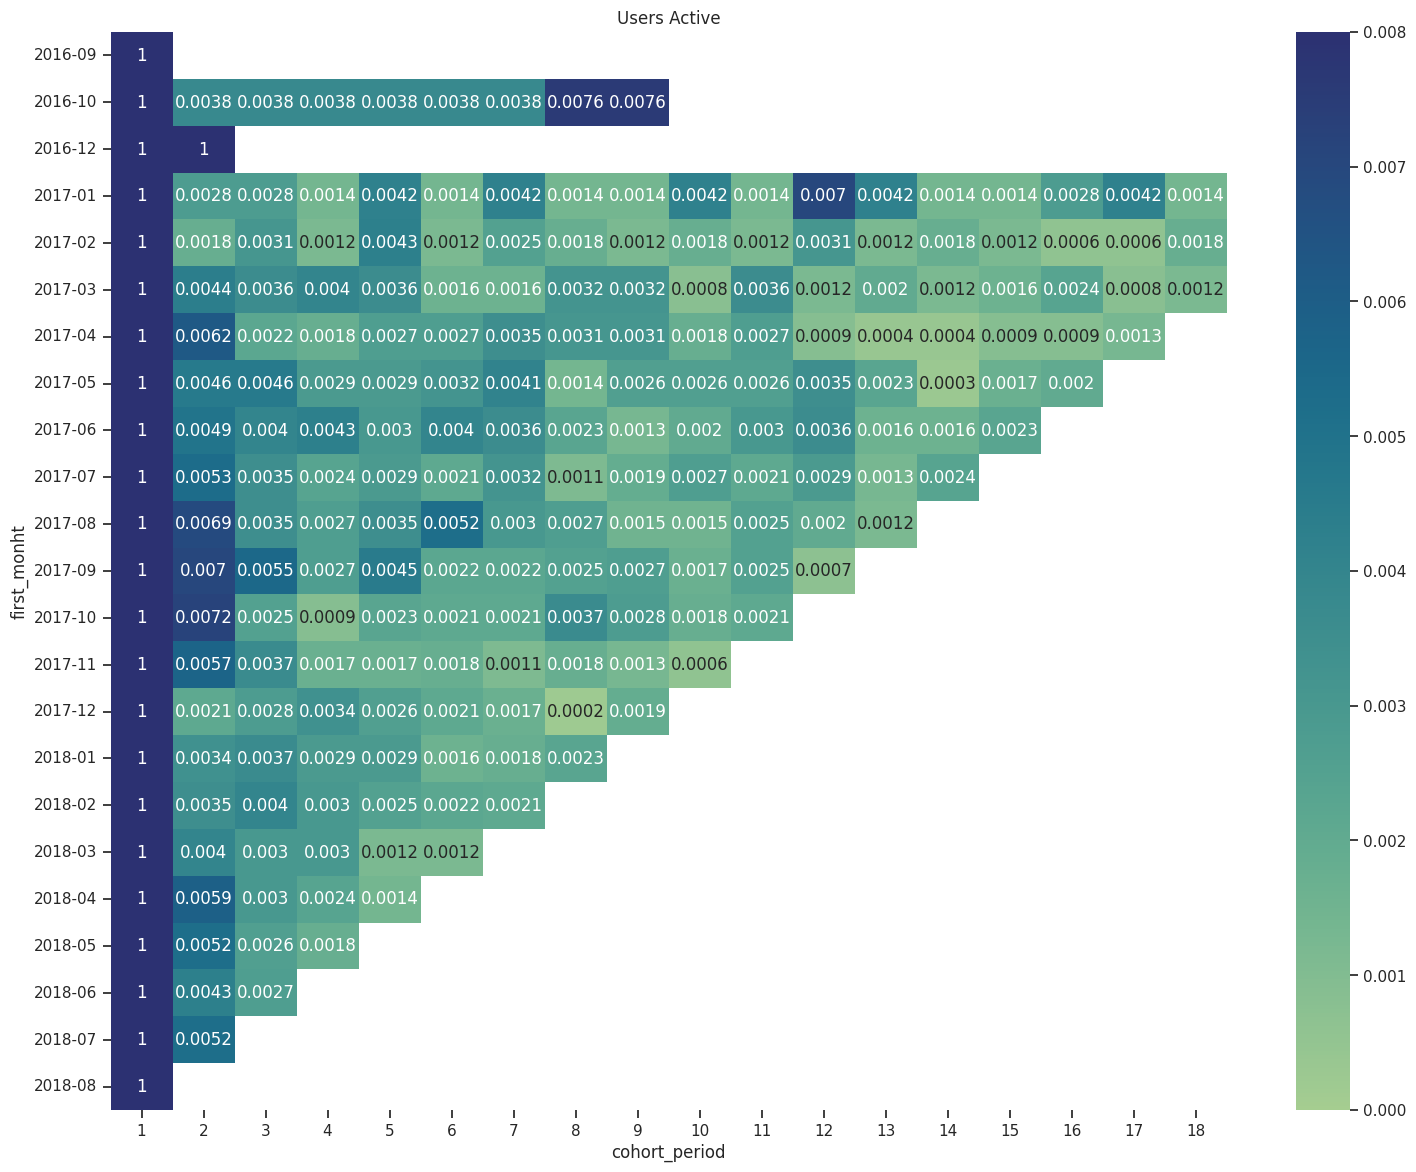

In [ ]:
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(18,14))
plt.title('Users Active')
ax = sns.heatmap(data=retention_pr, annot=True, vmin=0.0,vmax=0.008 ,cmap='crest')
ax.set_yticklabels(retention_pr.index)
fig=ax.get_figure()
#fig.savefig("Retention Counts.png")

plt.show()

In [ ]:
import plotly.express as px
fig = px.imshow(retention_pr, text_auto=True, aspect="auto")
fig.show()

##6- RFM-сегментация пользователей

In [ ]:
from datetime import date,timedelta
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
merged= pd.merge(customers, orders, on="customer_id")
merged= merged.merge(items, on="order_id")
merged.shape

(112650, 18)

In [ ]:
merged= merged[merged['order_status'] =="delivered"]
merged_df = merged.dropna(axis=0)
len(merged_df[merged_df.duplicated()])
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110173 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    110173 non-null  object        
 1   customer_unique_id             110173 non-null  object        
 2   customer_zip_code_prefix       110173 non-null  int64         
 3   customer_city                  110173 non-null  object        
 4   customer_state                 110173 non-null  object        
 5   order_id                       110173 non-null  object        
 6   order_status                   110173 non-null  object        
 7   order_purchase_timestamp       110173 non-null  datetime64[ns]
 8   order_approved_at              110173 non-null  object        
 9   order_delivered_carrier_date   110173 non-null  object        
 10  order_delivered_customer_date  110173 non-null  object        
 11  

Так как датасет не самый свежий, вместо текущей даты будем использовать max+2. Для создания recency, frequency и monetary мы сгруппируем наши записи по customer_id.

In [ ]:
present_day = merged_df['order_purchase_timestamp'].max() + timedelta(days=2)
present_day

Timestamp('2018-08-31 15:00:37')

In [ ]:
print("Latest date in dataset: ", merged_df['order_purchase_timestamp'].max())

Latest date in dataset:  2018-08-29 15:00:37


In [ ]:
rfm_df = merged_df.reset_index().groupby('customer_unique_id')\
.agg({'order_purchase_timestamp': lambda x: (present_day  - x.max()).days,
                                              'order_id': lambda x: len(x),
                                                'price': lambda x: x.sum()})
rfm_df.rename(columns={'order_purchase_timestamp': 'recency',
                          'order_id': 'frequency',
                          'price': 'monetary_value'}, inplace=True)
rfm_df.head()

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,18.90
0000f46a3911fa3c0805444483337064,538,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99
0004aac84e0df4da2b147fca70cf8255,289,1,180.00


In [ ]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,93336.0,238.903853,152.552964,2.00,115.00,220.0,347.0000,715.0
frequency,93336.0,1.180391,0.620913,1.00,1.00,1.0,1.0000,24.0
monetary_value,93336.0,141.621663,215.714143,0.85,47.65,89.7,154.6925,13440.0


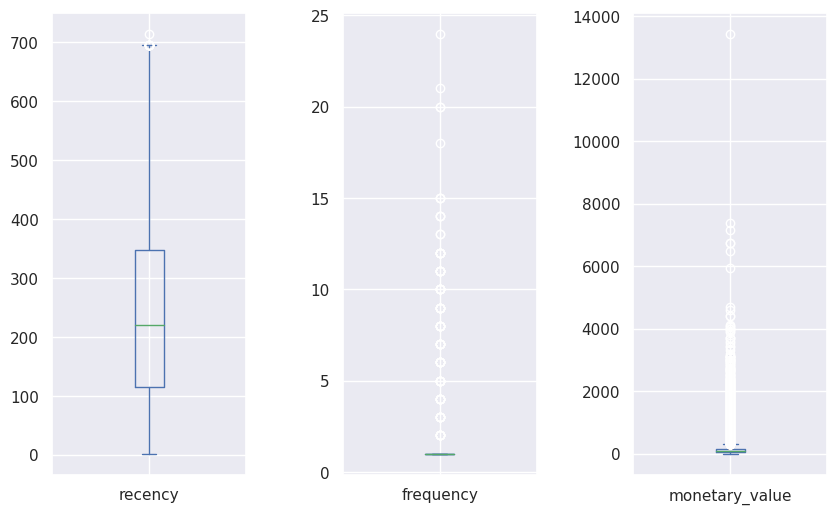

In [ ]:
rfm_df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

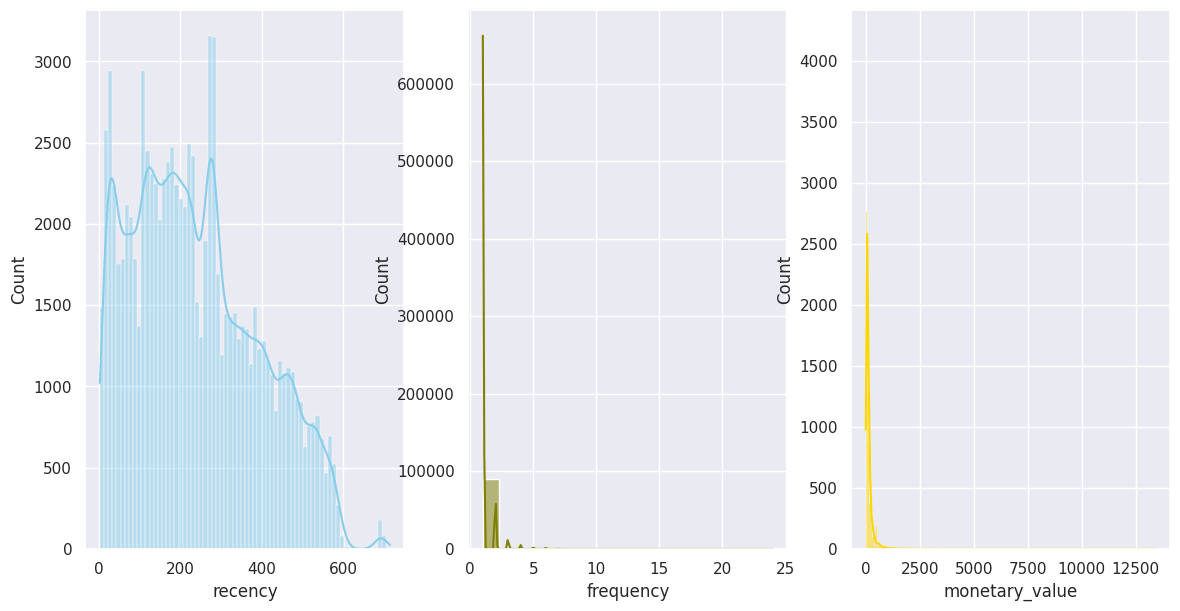

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

sns.histplot(data=rfm_df, x="recency", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=rfm_df, x="frequency", kde=True, color="olive", ax=axs[1])
sns.histplot(data=rfm_df, x="monetary_value", kde=True, color="gold", ax=axs[2])

plt.show()

In [ ]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm_df))
print(z)

                                   recency  frequency  monetary_value
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2  0.825317   0.290527        0.054339
0000b849f77a49e4a4ce2b2a4ca5be3f  0.805651   0.290527        0.568912
0000f46a3911fa3c0805444483337064  1.960616   0.290527        0.336659
0000f6ccb0745a6a4b88665a16c9f078  0.544707   0.290527        0.536044
0004aac84e0df4da2b147fca70cf8255  0.328387   0.290527        0.177914
...                                    ...        ...             ...
fffcf5a5ff07b0908bd4e2dbc735a684  1.370654   1.320012        6.621661
fffea47cd6d3cc0a88bd621562a9d061  0.157954   0.290527        0.355712
ffff371b4d645b6ecea244b27531430a  2.163825   0.290527        0.239771
ffff5962728ec6157033ef9805bacc48  0.779431   0.290527        0.123412
ffffd2657e2aad2907e67c3e9daecbeb  1.613194   0.290527        0.392335

[93336 rows x 3 columns]


In [ ]:
rfm_clean = rfm_df[(z < 3).all(axis=1)]
rfm_clean.shape

(90657, 3)

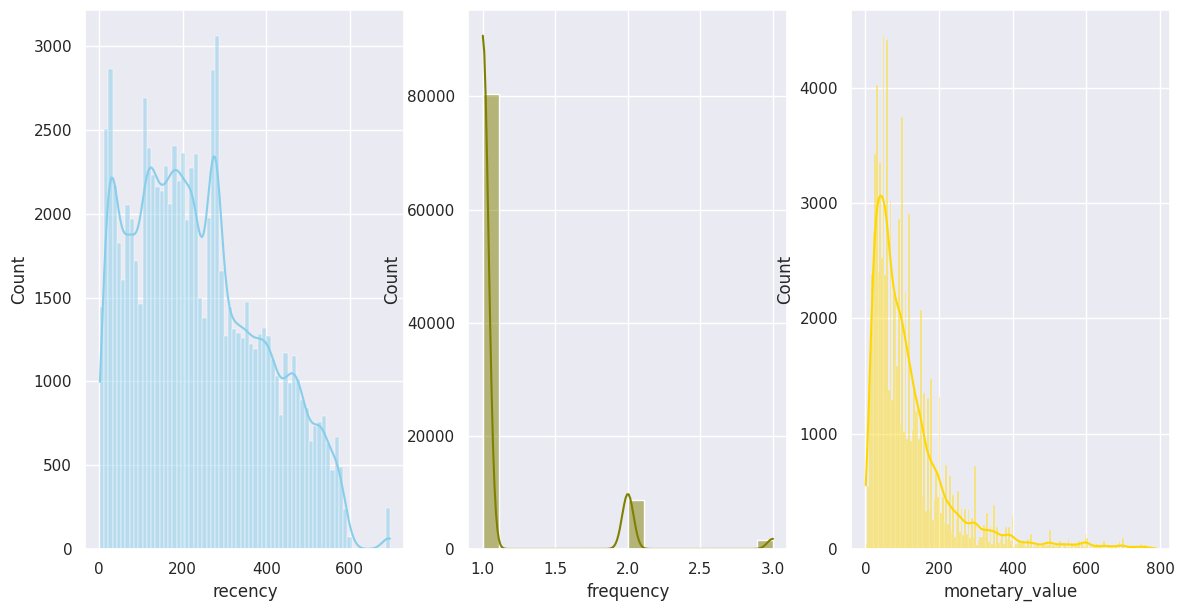

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

sns.histplot(data=rfm_clean, x="recency", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=rfm_clean, x="frequency", kde=True, color="olive", ax=axs[1])
sns.histplot(data=rfm_clean, x="monetary_value", kde=True, color="gold", ax=axs[2])

plt.show()

RFM Score

In [ ]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population.
quintiles = rfm_clean[['recency', 'frequency', 'monetary_value']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 93.0, 0.4: 179.0, 0.6: 269.0, 0.8: 383.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary_value': {0.2: 39.0, 0.4: 67.9, 0.6: 105.0, 0.8: 169.9}}

In [ ]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [ ]:
 #Calculate RFM score for each customer
 pd.options.mode.chained_assignment = None

rfm_clean['R'] = rfm_clean['recency'].apply(lambda x: r_score(x))
rfm_clean['F'] = rfm_clean['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm_clean['M'] = rfm_clean['monetary_value'].apply(lambda x: fm_score(x, 'monetary_value'))
rfm_clean['RFM Score'] = rfm_clean['R'].map(str) + rfm_clean['F'].map(str) + rfm_clean['M'].map(str)
rfm_clean.head()

,recency,frequency,monetary_value,R,F,M,RFM Score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,129.90,4,1,4,414
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,18.90,4,1,1,411
0000f46a3911fa3c0805444483337064,538,1,69.00,1,1,3,113
0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,289,1,180.00,2,1,5,215


In [ ]:
# Created 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'

}

rfm_clean['Segment'] = rfm_clean['R'].map(str) + rfm_clean['F'].map(str)
rfm_clean['Segment'] = rfm_clean['Segment'].replace(segments, regex=True)
rfm_clean.head()

,recency,frequency,monetary_value,R,F,M,RFM Score,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,129.90,4,1,4,414,new customers
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,18.90,4,1,1,411,new customers
0000f46a3911fa3c0805444483337064,538,1,69.00,1,1,3,113,at risk
0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99,2,1,1,211,at risk
0004aac84e0df4da2b147fca70cf8255,289,1,180.00,2,1,5,215,at risk


In [ ]:
# count the number of customers in each segment
segments_counts = rfm_clean['Segment'].value_counts().sort_values(ascending=True)

segments_counts

champions           2002
can't loose         4051
loyal customers     4174
needs attention    15993
at risk            32074
new customers      32363
Name: Segment, dtype: int64

Цель RFM анализа сформировать сегменты и в зависимости от сегмента воздействовать на них определенным образом. Например: предложить бонус, льготу, отправить push или email уведомление. Важно делать это таргетировано.

Эффект от использования RFM анализа может быть следующим: удержание клиентов, повышение дохода, повышение лояльность клиентов.

Примеры интерпретации сегментов RFM анализа:

* R=5, F=5, M=5 — платят чаcто, много и недавно. Самые лояльным и активные пользователи.
* R=1, F=1, M=1 — платят мало, редко и давно. Скорее всего потерянные клиенты. Возможно не стоит предпринять действия по их возврату, если цена привлечения выше ожидаемой прибыли.
* R=1/2, F=4/5, M=4/5 — лояльные пользователи на грани ухода. Предлагаем им бонус, скидку и пытаемся их вернуть.
* R=4/5, F=1, M=1/2/3/4/5 — пользователи недавно совершили платеж. Пробуем их стимулировать покупать еще.